## Predicting the Severity of a Car Accident
- Student names: Jagandeep Singh & Yehuda Schein
- Student pace: full-time
- Scheduled project review date: 21 August
- Instructor name: Sean Wilson

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

In [4]:
df.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4098
CRASH_DATE_EST_I                 398108
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         231098
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       10097
CRASH_TYPE                            0
INTERSECTION_RELATED_I           333742
NOT_RIGHT_OF_WAY_I               409947
HIT_AND_RUN_I                    307314
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [5]:
df.LOCATION.dtype

dtype('O')

In [11]:
df.drop(df[df.LOCATION.isna()].index, inplace = True)

In [43]:
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",06/30/2017 04:01:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,8301,S,CICERO AVE,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,NaN,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"OVER $1,500",03/21/2019 10:52:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,8301,S,CICERO AVE,834.0,NaN,Y,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
5,0126747fc9ffc0edc9a38abb83d80034f897db0f739eef...,JB200478,NaN,03/26/2018 02:23:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",03/26/2018 03:20:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3999,N,AVONDALE AVE,1732.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,14,2,3,41.953647,-87.732082,POINT (-87.732081736006 41.953646899951)
6,0209e21f298984f7375742b7ef27c9880b485f41123a12...,JB415436,NaN,08/30/2018 05:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"OVER $1,500",08/30/2018 05:58:00 PM,IMPROPER OVERTAKING/PASSING,IMPROPER LANE USAGE,600,W,DIVISION ST,1822.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,5,8,41.903825,-87.643286,POINT (-87.643286359995 41.903825233976)
7,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",06/11/2019 09:05:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,50,E,GARFIELD BLVD,225.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)


In [10]:
street_map = gpd.read_file('geo_export_0d48d92e-3832-4cc0-a89c-b024e43268c8.shp')

In [44]:

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, geometry = geometry)

In [75]:
geo_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,geometry
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",06/30/2017 04:01:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,8301,S,CICERO AVE,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),POINT (-87.74095 41.74180)
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,NaN,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"OVER $1,500",03/21/2019 10:52:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,8301,S,CICERO AVE,834.0,NaN,Y,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),POINT (-87.74095 41.74180)
5,0126747fc9ffc0edc9a38abb83d80034f897db0f739eef...,JB200478,NaN,03/26/2018 02:23:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",03/26/2018 03:20:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3999,N,AVONDALE AVE,1732.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,14,2,3,41.953647,-87.732082,POINT (-87.732081736006 41.953646899951),POINT (-87.73208 41.95365)
6,0209e21f298984f7375742b7ef27c9880b485f41123a12...,JB415436,NaN,08/30/2018 05:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"OVER $1,500",08/30/2018 05:58:00 PM,IMPROPER OVERTAKING/PASSING,IMPROPER LANE USAGE,600,W,DIVISION ST,1822.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,5,8,41.903825,-87.643286,POINT (-87.643286359995 41.903825233976),POINT (-87.64329 41.90383)
7,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",06/11/2019 09:05:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,50,E,GARFIELD BLVD,225.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028),POINT (-87.62383 41.79478)


In [76]:
first_10000 = geo_df.head(10000)

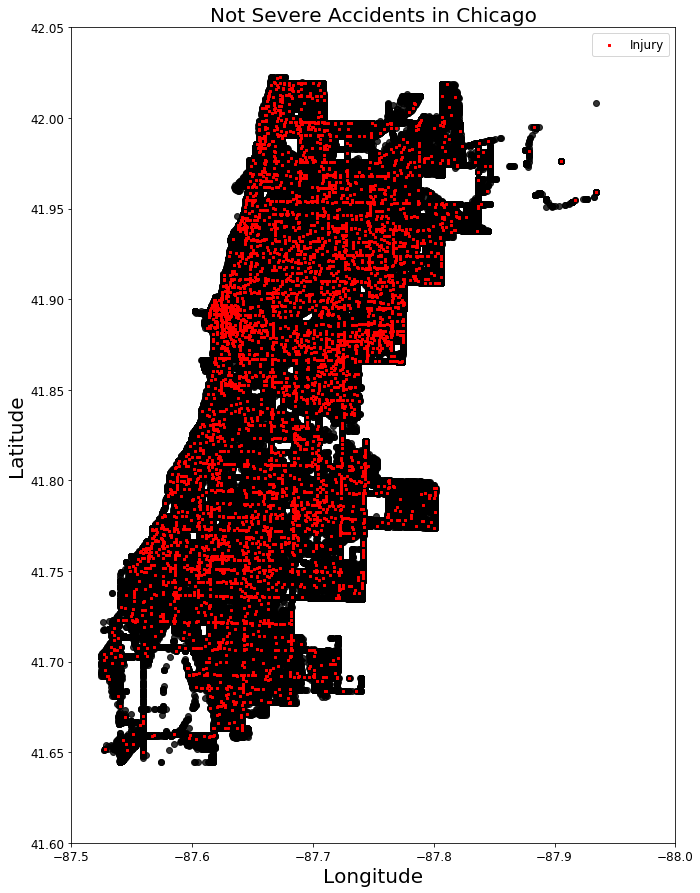

In [77]:


fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha = 0.8, color = 'black')

first_10000[first_10000['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY'].plot(ax = ax , markersize = 2,
                      color = 'red', marker = 's', label = 'Injury', aspect = 1.5)
plt.legend(prop = {'size':12})
ax.set_title('Not Severe Accidents in Chicago', fontdict ={'fontsize': 20})
ax.set_ylabel("Latitude",fontdict = {'fontsize': 20})
ax.set_xlabel("Longitude",fontdict = {'fontsize': 20})

plt.xlim(-87.5,-88)
plt.ylim( 41.6,42.05)
# show map
plt.show()


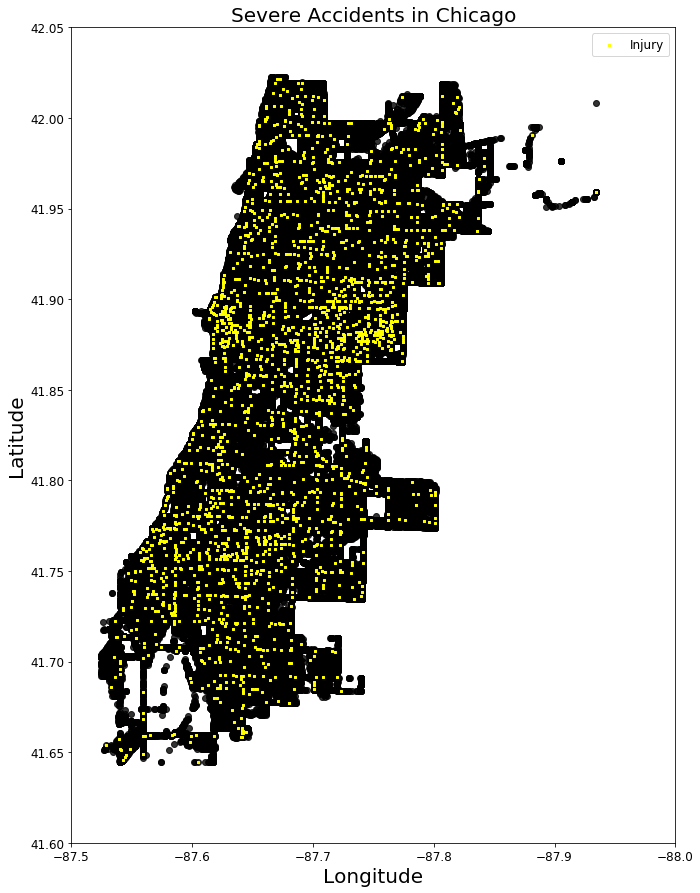

In [78]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha = 0.8, color = 'black')
first_10000[first_10000['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH'].plot(ax = ax , markersize = 2,
                      color = 'yellow', marker = 's', label = 'Injury', aspect = 1.5)
plt.legend(prop = {'size':12})
ax.set_title('Severe Accidents in Chicago', fontdict ={'fontsize': 20})
ax.set_ylabel("Latitude",fontdict = {'fontsize': 20})
ax.set_xlabel("Longitude",fontdict = {'fontsize': 20})

plt.xlim(-87.5,-88)
plt.ylim( 41.6,42.05)
# show map
plt.show()

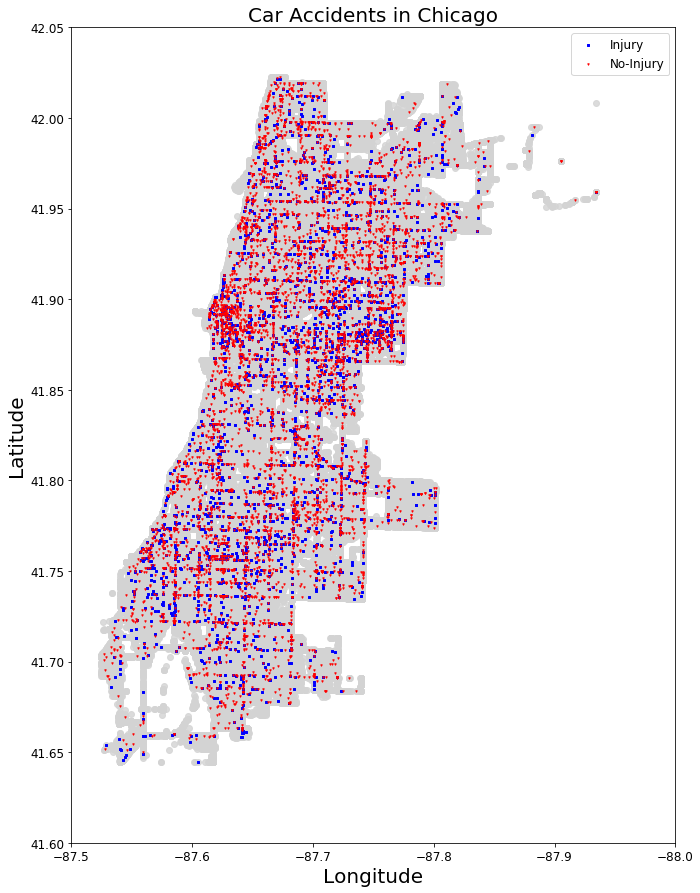

In [79]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha = 0.8, color = 'lightgrey')

first_10000[first_10000['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH'].plot(ax = ax , markersize = 2,
                      color = 'blue',marker = 's',label = 'Injury', aspect = 1.5)
first_10000[first_10000['CRASH_TYPE'] == 'NO INJURY / DRIVE AWAY'].plot(ax = ax , markersize = 2,
                      color = 'red',marker = 'v',label = 'No-Injury',aspect = 1.5)


plt.legend(prop = {'size':12})
ax.set_title('Car Accidents in Chicago', fontdict ={'fontsize': 20})
ax.set_ylabel("Latitude",fontdict = {'fontsize': 20})
ax.set_xlabel("Longitude",fontdict = {'fontsize': 20})
plt.xlim(-87.5,-88)
plt.ylim( 41.6,42.05)
# show map
plt.show()